# Uma revisão rápida

![](../data/imgs/knn0.png)

# Entendendo o problema

Fonte: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
O dataset: 
    Os dados estão relacionados com campanhas de marketing direto (chamadas telefônicas de ums instituição bancária). O objetivo é construirmos um modelo que seja capaz de prever se o cliente irá fazer um depóstio a prazo (?)

- Explorando um pouco os dados



Vendo o README podemos entender um pouco melhor as variáveis:

```
   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management",
   "housemaid","entrepreneur","student",
    "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
```

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [2]:
bank = pd.read_csv('../data/bank-full.csv', sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Olhando aqui, que tipo de problemas estamos lidando?

Vendo pelos dados, talvez seja interessante explorarmos algumas variáveis: `campagin`; `pdays`; `balance`; entre outras

Que tal potar gráficos, fazer contagem? Entendar os nossos dados?

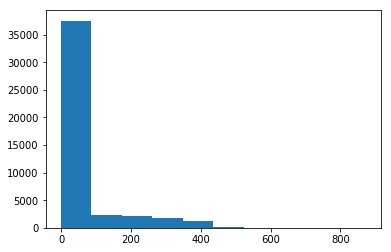

In [5]:
plt.hist(bank['pdays'])
plt.show()

Com o que aprendemos no curso até hoje, como que vocês resolveriam o problema??

Agora, vamos plotar algumas variáveis em conjunto?

In [ ]:
colors=[]
for label in bank['y']:
    if label == 'yes':
        colors.append('red')
    else:
        colors.append('green')
        
legend_dict = { 'yes' : 'red', 'no' : 'green' }

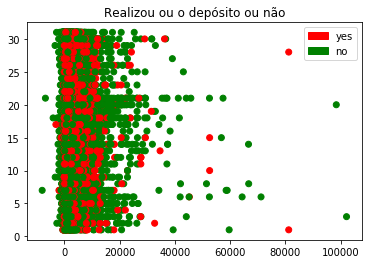

In [11]:
plt.title('Realizou ou o depósito ou não')
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.scatter(bank['balance'], bank['day'],color=colors)
plt.legend(handles=patchList)
plt.show()

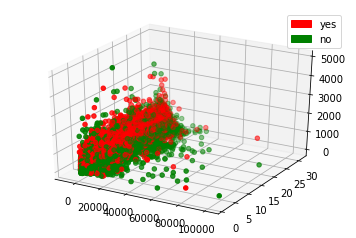

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bank['balance'], bank['day'], bank['duration'], color=colors)
plt.legend(handles=patchList)
plt.show()

Talvez não seja possível traçar uma linha que resolva o problema e tenhamos que partir para técnicas mais sofisticadas que sejam capazes de pegar essa "fronteira". Esse é o casos dos classificadores não lineares: Redes Neurais e o kNN, que vamos ver hoje.  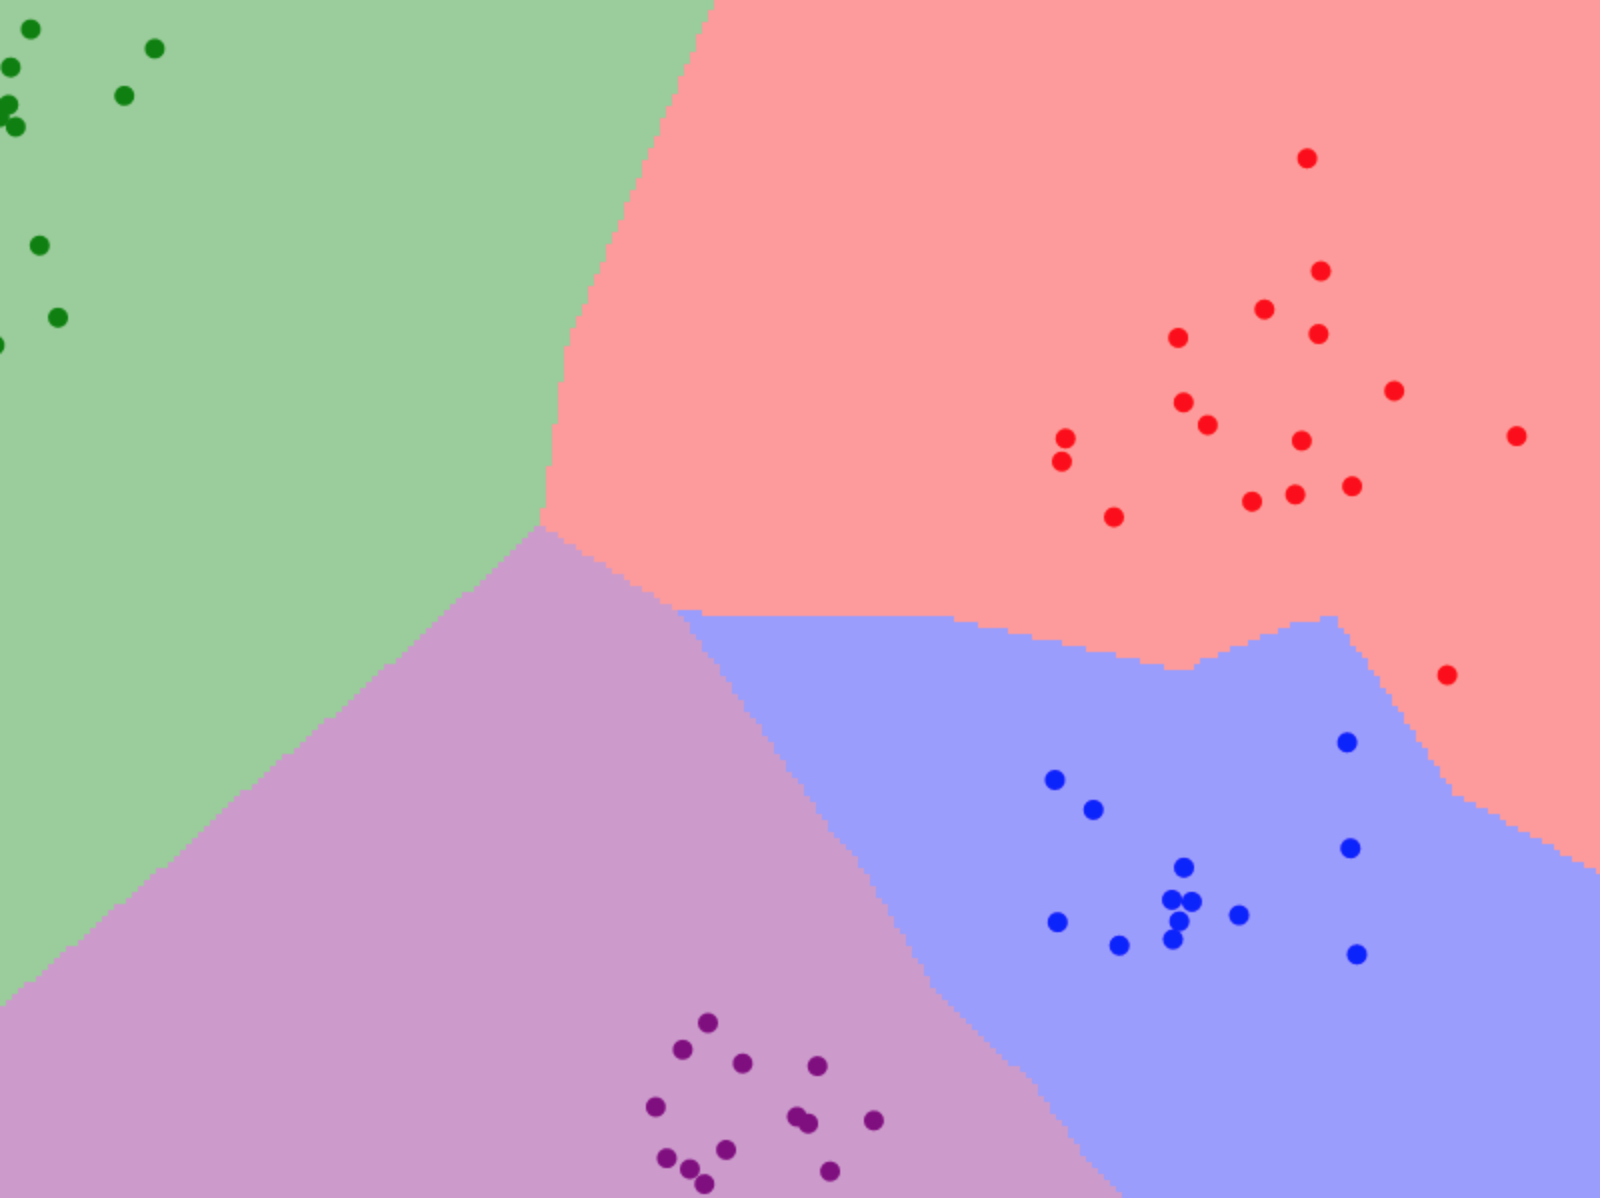